# Pêndulo Duplo (Double Pendulum)

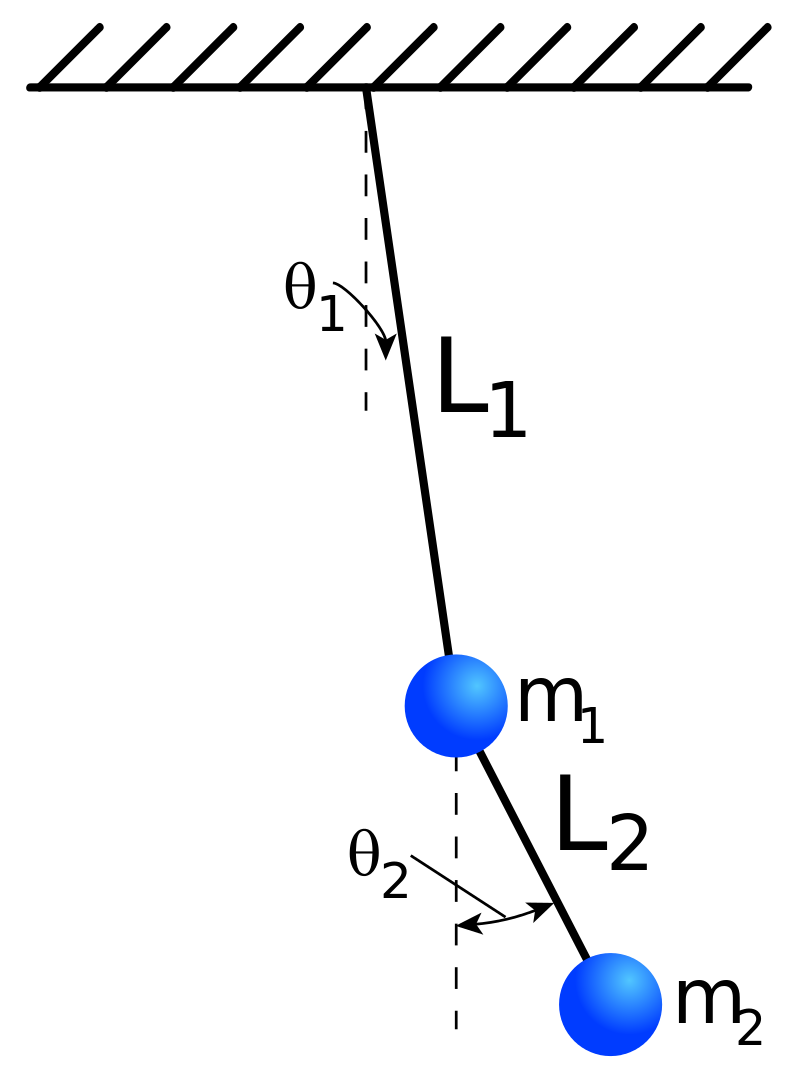

## Problema: Definir as equações de movimento para um pêndulo duplo, resolver numericamente e criar uma simulação do sistema físico.

In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Primeiro definimos as constantes que iremos usar.
$t$ e $g$ são o tempo e a acelerção gravitacional, respectivamente. $m_1$ e $m_2$ são as massas das partículas e $L_1$ e $L_2$ o comprimento de cada haste.

In [2]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1 L2')

Definimos nossas funções $\theta_1$ e $\theta_2$ como funções do tempo que irão descrever o movimento do pêndulo.

In [3]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

In [4]:
the1 = the1(t)
the2 = the2(t)

In [5]:
the1

\theta_1(t)

Aqui criamos as derivadas temporais de $\theta_1$ e $\theta_2$ e derivadas segunda também.

In [6]:
dT1_dt = the1.diff(t)
dT2_dt = the2.diff(t)
dT1_dtt = dT1_dt.diff(t)
dT2_dtt = dT2_dt.diff(t)

In [7]:
dT1_dtt

Derivative(\theta_1(t), (t, 2))

Agora definimos as posições $x_1$, $y_1$, $x_2$ e $y_2$ das massas em termos dos ângulos e do comprimento das hastes.

In [8]:
x1 = smp.sin(the1)*L1
y1 = -smp.cos(the1)*L1
x2 = smp.sin(the1)*L1 + smp.sin(the2)*L2
y2 = -smp.cos(the1)*L1 - smp.cos(the2)*L2

Montamos a energia cinética das massas dada por $K = \frac{1}{2}m_1\left(\frac{dx_1}{dt}^2 + \frac{dy_1}{dt}^2\right) + \frac{1}{2}m_2\left(\frac{dx_2}{dt}^2 + \frac{dy_2}{dt}^2\right)$, a energia potencial $V = m_1gy_1 + m_2gy_2$ e finalmente
definimos a lagrangiana $L = K - V$ do sistema.

In [9]:
# Energia cinética
K = (1/2)*m1*(smp.diff(x1, t)**2 + smp.diff(y1, t)**2) + (1/2)*m2*(smp.diff(x2, t)**2 + smp.diff(y2, t)**2)

#Energia Potencial
V = m1*g*y1 + m2*g*y2

#Lagrangiana
L = K - V

In [10]:
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

Utilizando as equações de Euler-Lagrange $\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q_i}}\right) - \frac{\partial L}{\partial q_i} = 0$ podemos montar o sistema de equações de movimento para serem resolvidas numericamente.

In [11]:
# Equações de movimento
LE1 = L.diff(the1) - ((L.diff(dT1_dt)).diff(t)).simplify()
LE2 = L.diff(the2) - ((L.diff(dT2_dt)).diff(t)).simplify()

In [12]:
LE2

-L2*g*m2*sin(\theta_2(t)) - 1.0*L2*m2*(-L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L2*Derivative(\theta_2(t), (t, 2))) + 0.5*m2*(2*L2*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) - 2*L2*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_2(t))*Derivative(\theta_2(t), t))

In [13]:
sols = smp.solve([LE1,LE2], (dT1_dtt,dT2_dtt),
                simplify=False, rational=False)

In [14]:
sols[dT1_dtt]

-1.0*L1*m2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) + 1.0*L1*m2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) - 1.0*L1*m2*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) + 1.0*L1*m2*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) + 1.0*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) - 1.0*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta

In [15]:
dz1_dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,dT1_dt,dT2_dt), sols[dT1_dtt])
dz2_dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,dT1_dt,dT2_dt), sols[dT2_dtt])
dT1_dt_f = smp.lambdify(dT1_dt,dT1_dt)
dT2_dt_f = smp.lambdify(dT2_dt,dT2_dt)

In [43]:
dz1_dt_f

<function _lambdifygenerated(t, g, m1, m2, L1, L2, _Dummy_33, _Dummy_32, _Dummy_31, _Dummy_30)>

In [17]:
def dSdt(S,t,g,m1,m2,L1,L2):
    the1, z1, the2, z2 = S
    return [
        dT1_dt_f(z1),
        dz1_dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dT2_dt_f(z2),
        dz2_dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2)
    ]

In [39]:
t = np.linspace(0,40,1001)
g = 9.81
m1 = 4
m2 = 2
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[1.5, -3, -0.78, 5], t=t, args=(g,m1,m2,L1,L2))

In [19]:
ans.T

array([[  1.        ,   0.87413906,   0.73333306, ...,  -0.88616579,
         -0.70444762,  -0.52275734],
       [ -3.        ,  -3.31025173,  -3.75998052, ...,   4.19459676,
          4.73165892,   4.24973584],
       [ -1.        ,  -0.78277685,  -0.52139856, ...,  12.25096793,
         11.77817817,  11.32116145],
       [  5.        ,   5.91440903,   7.24155048, ..., -11.00398717,
        -12.17998297, -10.37241422]])

In [40]:
the1 = ans.T[0]
the2 = ans.T[2]

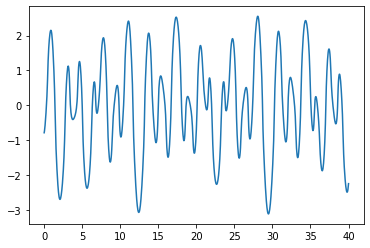

In [32]:
plt.plot(t, the2)

In [41]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
           -L1*np.cos(the1),
           L1*np.sin(the1) + L2*np.sin(the2),
           -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

In [ ]:
x1

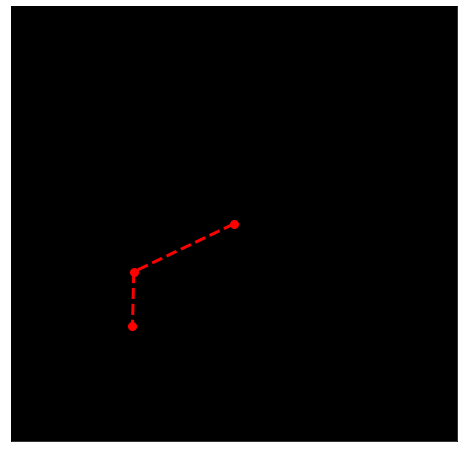

In [42]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)